<a href="https://colab.research.google.com/github/payelchy580/DIP_Labworks/blob/main/Lab3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


Selected Image: rabbit.143.jpg


(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

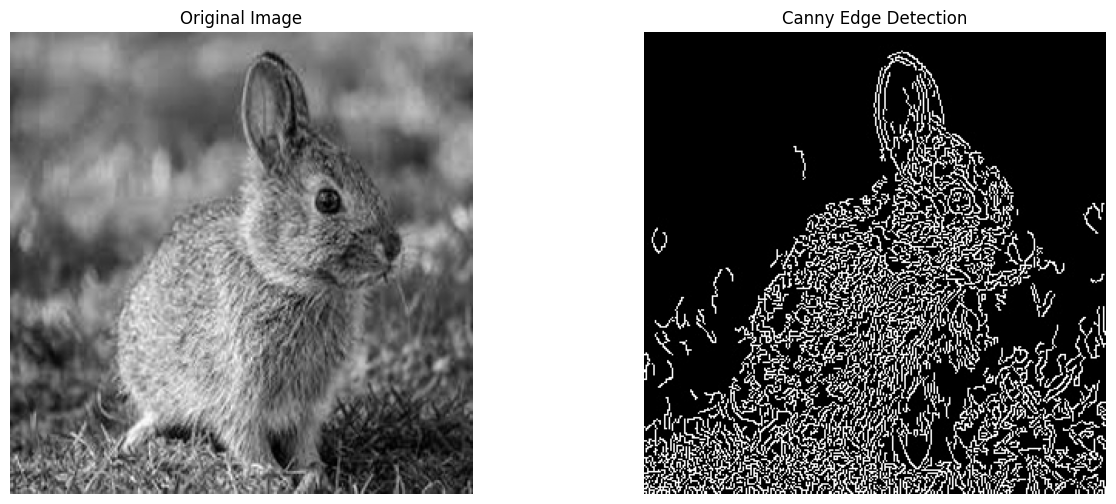

In [2]:
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input and output directories
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'
canny_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_canny'
# Create output folders if they don’t exist
os.makedirs(canny_folder, exist_ok=True)
# Process each image
for filename in os.listdir(grayscale_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(grayscale_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Canny Edge Detection
        canny = cv2.Canny(img, 100, 200)
        cv2.imwrite(os.path.join(canny_folder, filename), canny)
        # Choose one random image
random_filename = random.choice([f for f in os.listdir(grayscale_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Paths
original_path = os.path.join(grayscale_folder, random_filename)
canny_path = os.path.join(canny_folder, random_filename)

# Read images
original = mpimg.imread(original_path)
canny = mpimg.imread(canny_path)

# Display all in 1 row
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(canny, cmap='gray')
axes[1].set_title("Canny Edge Detection")
axes[1].axis('off')

✅ All images processed successfully with Sobel edge detection.
Selected Image: rabbit.66.jpg


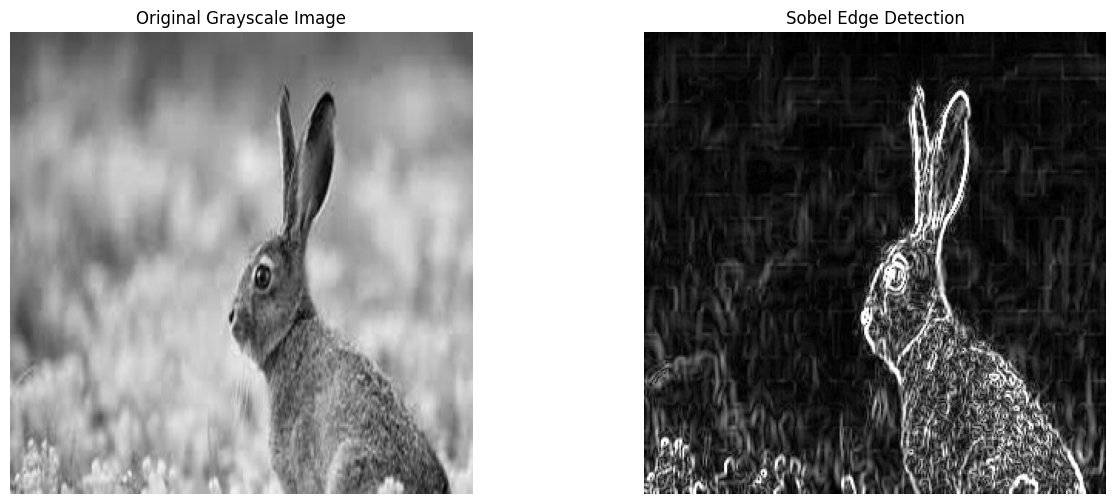

In [3]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input and output directories
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'
sobel_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_sobel'

# Create output folder if it doesn’t exist
os.makedirs(sobel_folder, exist_ok=True)

# -----------------------------------------------------------
# Step 1: Apply Sobel Edge Detection and Save
# -----------------------------------------------------------
for filename in os.listdir(grayscale_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(grayscale_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply Sobel operator in X and Y direction
        sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

        # Combine the two gradients
        sobel = cv2.magnitude(sobel_x, sobel_y)

        # Normalize for saving (convert back to 8-bit)
        sobel = cv2.convertScaleAbs(sobel)

        # Save Sobel image
        cv2.imwrite(os.path.join(sobel_folder, filename), sobel)

print("✅ All images processed successfully with Sobel edge detection.")

# -----------------------------------------------------------
# Step 2: Display one random example
# -----------------------------------------------------------
random_filename = random.choice([f for f in os.listdir(grayscale_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Paths
original_path = os.path.join(grayscale_folder, random_filename)
sobel_path = os.path.join(sobel_folder, random_filename)

# Read images
original = mpimg.imread(original_path)
sobel = mpimg.imread(sobel_path)

# Display both images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(sobel, cmap='gray')
axes[1].set_title("Sobel Edge Detection")
axes[1].axis('off')

plt.show()


✅ All images processed successfully with Prewitt edge detection.
Selected Image: rabbit.178.jpg


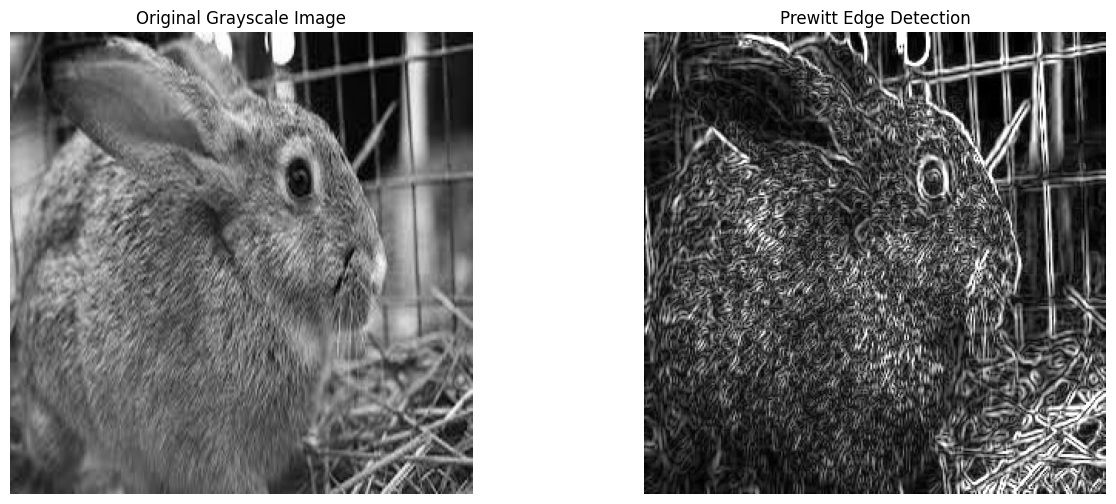

In [4]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Input and output directories
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'
prewitt_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_prewitt'

# Create output folder if it doesn’t exist
os.makedirs(prewitt_folder, exist_ok=True)

# -----------------------------------------------------------
# Step 1: Apply Prewitt Edge Detection and Save
# -----------------------------------------------------------
for filename in os.listdir(grayscale_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(grayscale_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Define Prewitt kernels
        prewitt_kernel_x = np.array([[ -1, 0, 1],
                                     [ -1, 0, 1],
                                     [ -1, 0, 1]], dtype=np.float32)

        prewitt_kernel_y = np.array([[ -1, -1, -1],
                                     [  0,  0,  0],
                                     [  1,  1,  1]], dtype=np.float32)

        # Apply Prewitt operator
        prewitt_x = cv2.filter2D(img, cv2.CV_64F, prewitt_kernel_x)
        prewitt_y = cv2.filter2D(img, cv2.CV_64F, prewitt_kernel_y)

        # Combine the two gradients
        prewitt = cv2.magnitude(prewitt_x, prewitt_y)

        # Normalize for saving (convert back to 8-bit)
        prewitt = cv2.convertScaleAbs(prewitt)

        # Save Prewitt image
        cv2.imwrite(os.path.join(prewitt_folder, filename), prewitt)

print("✅ All images processed successfully with Prewitt edge detection.")

# -----------------------------------------------------------
# Step 2: Display one random example
# -----------------------------------------------------------
random_filename = random.choice([f for f in os.listdir(grayscale_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Paths
original_path = os.path.join(grayscale_folder, random_filename)
prewitt_path = os.path.join(prewitt_folder, random_filename)

# Read images
original = mpimg.imread(original_path)
prewitt = mpimg.imread(prewitt_path)

# Display both images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(prewitt, cmap='gray')
axes[1].set_title("Prewitt Edge Detection")
axes[1].axis('off')

plt.show()


✅ All images processed successfully with Morphological Dilation.
Selected Image: rabbit.100.jpg


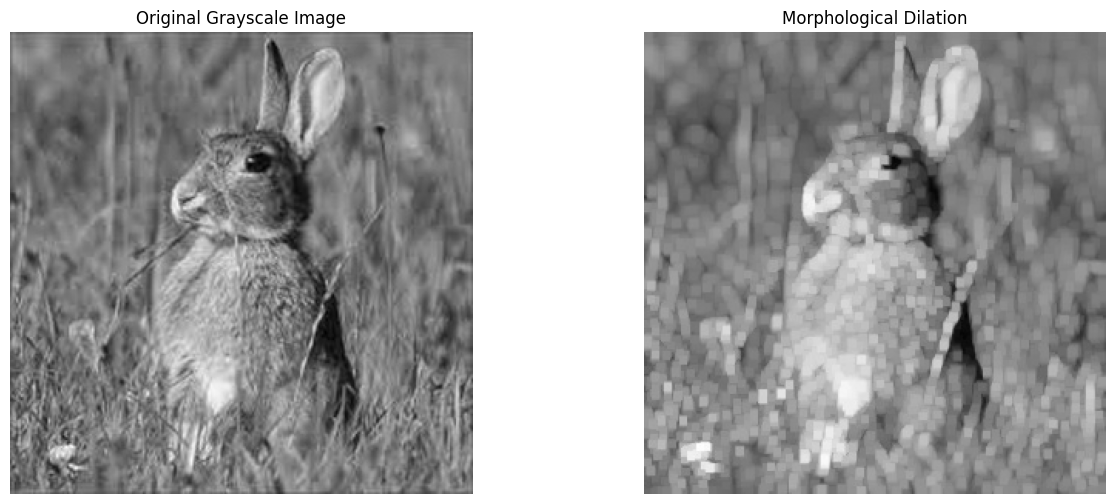

In [5]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Input and output directories
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'
dilation_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_dilation'

# Create output folder if it doesn’t exist
os.makedirs(dilation_folder, exist_ok=True)

# -----------------------------------------------------------
# Step 1: Apply Morphological Dilation and Save
# -----------------------------------------------------------
for filename in os.listdir(grayscale_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(grayscale_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Define structuring element (kernel)
        kernel = np.ones((5, 5), np.uint8)  # 5x5 square kernel

        # Apply dilation
        dilated = cv2.dilate(img, kernel, iterations=1)

        # Save dilated image
        cv2.imwrite(os.path.join(dilation_folder, filename), dilated)

print("✅ All images processed successfully with Morphological Dilation.")

# -----------------------------------------------------------
# Step 2: Display one random example
# -----------------------------------------------------------
random_filename = random.choice([f for f in os.listdir(grayscale_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Paths
original_path = os.path.join(grayscale_folder, random_filename)
dilation_path = os.path.join(dilation_folder, random_filename)

# Read images
original = mpimg.imread(original_path)
dilated = mpimg.imread(dilation_path)

# Display both images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(dilated, cmap='gray')
axes[1].set_title("Morphological Dilation")
axes[1].axis('off')

plt.show()


✅ All images processed successfully with Morphological Erosion.
Selected Image: rabbit.75.jpg


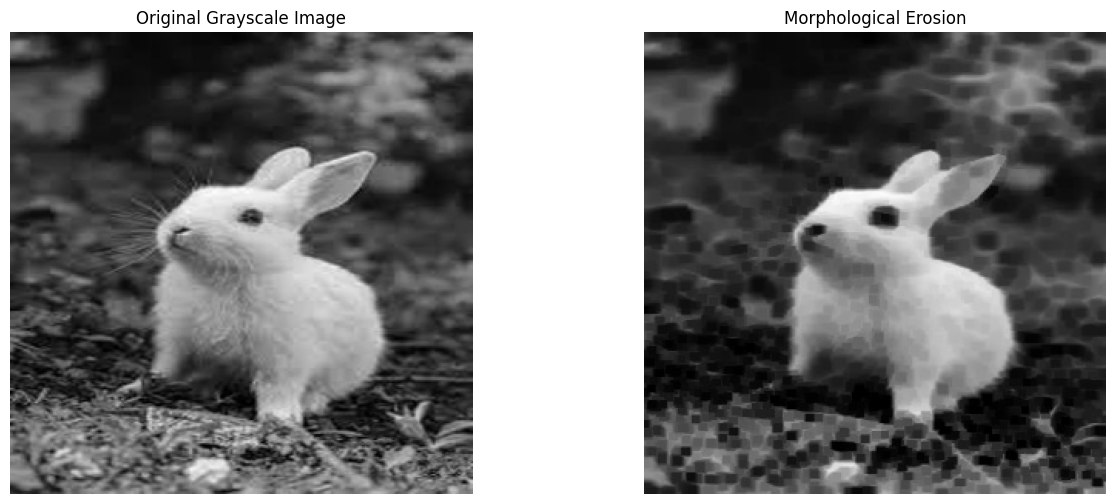

In [6]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Input and output directories
grayscale_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_grayscale'
erosion_folder = '/content/drive/MyDrive/Colab Notebooks/DIP Lab Works/rabbit_erosion'

# Create output folder if it doesn’t exist
os.makedirs(erosion_folder, exist_ok=True)

# -----------------------------------------------------------
# Step 1: Apply Morphological Erosion and Save
# -----------------------------------------------------------
for filename in os.listdir(grayscale_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(grayscale_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Define structuring element (kernel)
        kernel = np.ones((5, 5), np.uint8)  # 5x5 square kernel

        # Apply erosion
        eroded = cv2.erode(img, kernel, iterations=1)

        # Save eroded image
        cv2.imwrite(os.path.join(erosion_folder, filename), eroded)

print("✅ All images processed successfully with Morphological Erosion.")

# -----------------------------------------------------------
# Step 2: Display one random example
# -----------------------------------------------------------
random_filename = random.choice([f for f in os.listdir(grayscale_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
print("Selected Image:", random_filename)

# Paths
original_path = os.path.join(grayscale_folder, random_filename)
erosion_path = os.path.join(erosion_folder, random_filename)

# Read images
original = mpimg.imread(original_path)
eroded = mpimg.imread(erosion_path)

# Display both images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(eroded, cmap='gray')
axes[1].set_title("Morphological Erosion")
axes[1].axis('off')

plt.show()
